# NN tension prediction for SUPERball v3
### &nbsp; &nbsp; &nbsp; Chiara Ercolani


This implementation trains the neural network with a big dataset and then saves it.

Dataset:2017-10-24_BiggerBetterData_1kHz.mat

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import collections
import os
import collections
import matplotlib.pyplot as plt
import scipy.io

In [2]:
D=24   #number of features recorded at each time step(sequence length)
TRAIN_SET_SIZE=200000
TEST_SET_SIZE=100000

#Importing dataset
dataset=scipy.io.loadmat('2017-10-24_BiggerBetterData_1kHz.mat')
dataset_effort=dataset.get('effort')

#Dividing dataset into train and target subsets
train_target=[]
for i in range(0, TRAIN_SET_SIZE):
    train_target.append(dataset_effort[i,D])
train_target=np.asarray(train_target)
train_target=np.reshape(train_target,[len(train_target),1])
print(train_target.shape)

test_target=[]
for i in range(TRAIN_SET_SIZE, TRAIN_SET_SIZE+TEST_SET_SIZE):
    test_target.append(dataset_effort[i,D])
test_target=np.asarray(test_target) 
test_target=np.reshape(test_target,[len(test_target),1])
print(test_target.shape)

train_features=[]
for i in range(0, TRAIN_SET_SIZE):
    train_features.append(dataset_effort[i,0:D])
train_features=np.asarray(train_features)
train_features=np.reshape(train_features,[len(train_features),D])
print(train_features.shape)

test_features=[]
for i in range(TRAIN_SET_SIZE, TRAIN_SET_SIZE+TEST_SET_SIZE):
    test_features.append(dataset_effort[i,0:D])
test_features=np.asarray(test_features)
test_features=np.reshape(test_features,[len(test_features),D])

print(test_features.shape)

(200000, 1)
(100000, 1)
(200000, 24)
(100000, 24)


In [3]:
batch_size = 100
batch_len =len(train_features)//batch_size
                                
H = 5*D                                         # size of hidden state

print('train_data_len=',len(train_features),' batch_size=',batch_size,' batch_len=',
      batch_len,' D=',D,'H=',H)

train_data_len= 200000  batch_size= 100  batch_len= 2000  D= 24 H= 120


In [4]:
#Input shape: (num_samples,seq_length,input_dimension)
#Output shape: (num_samples, target)
Xin= tf.placeholder(tf.float32,shape=[batch_size,D],name='Xin')
Ytarget = tf.placeholder(tf.float32,shape=[batch_size,1],name='Ytarget')

#Xavier initialization for weights 
#http://andyljones.tumblr.com/post/110998971763/an-explanation-of-xavier-initialization
Wx = tf.get_variable("Wx", shape=[D, H],initializer=tf.contrib.layers.xavier_initializer()); print('Wx=',Wx.get_shape())
Wy = tf.get_variable("Wy", shape=[H, 1],initializer=tf.contrib.layers.xavier_initializer()); print('Wy=',Wy.get_shape())

#Biases initalized to 0
bh = tf.Variable(tf.zeros([1,H])); print('bh=',bh.get_shape())
by = tf.Variable(tf.zeros([1,1])); print('by=',by.get_shape())

Wx= (24, 120)
Wy= (120, 1)
bh= (1, 120)
by= (1, 1)


In [5]:
# NN implementation with ReLU function and one hidden layer

h_t=tf.nn.relu(tf.matmul(Xin,Wx)+bh)
y_=tf.matmul(h_t,Wy)+ by;

print('Ypredicted=',y_.get_shape())
print('Ytarget=',Ytarget.get_shape())

#Mean Absolute Error cost function

cost=tf.reduce_mean(tf.abs(tf.subtract(y_, Ytarget)))

#Optimizer used to implement backpropagation

optimizer = tf.train.AdamOptimizer(learning_rate=0.0002).minimize(cost)

Ypredicted= (100, 1)
Ytarget= (100, 1)


In [6]:
margin=0.1
lower_bound =tf.greater_equal(y_,tf.subtract(Ytarget,margin))
upper_bound= tf.less_equal(y_,tf.add(Ytarget,margin))
correct=tf.equal(lower_bound,upper_bound)
#correct=tf.equal(cast_out_data,cast_out_pred)
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
print('Accuracy measure set')

Accuracy measure set


Epoch: 0, Cost: 0.4531753659248352, Accuracy: 0.0
Epoch: 1, Cost: 0.44263848662376404, Accuracy: 0.0
Epoch: 2, Cost: 0.4367230236530304, Accuracy: 0.0
Epoch: 3, Cost: 0.4173702895641327, Accuracy: 0.0
Epoch: 4, Cost: 0.40686485171318054, Accuracy: 0.0
Epoch: 5, Cost: 0.4013022184371948, Accuracy: 0.0
Epoch: 6, Cost: 0.4010062515735626, Accuracy: 0.0
Epoch: 7, Cost: 0.39676058292388916, Accuracy: 0.0
Epoch: 8, Cost: 0.3904913663864136, Accuracy: 0.0
Epoch: 9, Cost: 0.38468918204307556, Accuracy: 0.0
Epoch: 10, Cost: 0.3826064169406891, Accuracy: 0.0
Epoch: 11, Cost: 0.3867359161376953, Accuracy: 0.0
Epoch: 12, Cost: 0.37865257263183594, Accuracy: 0.0
Epoch: 13, Cost: 0.3463800847530365, Accuracy: 0.0
Epoch: 14, Cost: 0.3451494872570038, Accuracy: 0.0
Epoch: 15, Cost: 0.3391864001750946, Accuracy: 0.0
Epoch: 16, Cost: 0.33624255657196045, Accuracy: 0.0
Epoch: 17, Cost: 0.33668071031570435, Accuracy: 0.0
Epoch: 18, Cost: 0.3295653462409973, Accuracy: 0.0
Epoch: 19, Cost: 0.326755225658416

Epoch: 153, Cost: 0.1445273905992508, Accuracy: 0.05000000074505806
Epoch: 154, Cost: 0.1435869187116623, Accuracy: 0.05000000074505806
Epoch: 155, Cost: 0.14369851350784302, Accuracy: 0.05000000074505806
Epoch: 156, Cost: 0.14313438534736633, Accuracy: 0.05000000074505806
Epoch: 157, Cost: 0.1428767591714859, Accuracy: 0.05000000074505806
Epoch: 158, Cost: 0.14416253566741943, Accuracy: 0.05000000074505806
Epoch: 159, Cost: 0.14467857778072357, Accuracy: 0.05000000074505806
Epoch: 160, Cost: 0.14518819749355316, Accuracy: 0.05000000074505806
Epoch: 161, Cost: 0.1423081010580063, Accuracy: 0.05000000074505806
Epoch: 162, Cost: 0.1407065987586975, Accuracy: 0.05999999865889549
Epoch: 163, Cost: 0.14038175344467163, Accuracy: 0.05999999865889549
Epoch: 164, Cost: 0.1400175541639328, Accuracy: 0.05999999865889549
Epoch: 165, Cost: 0.13952791690826416, Accuracy: 0.05999999865889549
Epoch: 166, Cost: 0.13751620054244995, Accuracy: 0.07000000029802322
Epoch: 167, Cost: 0.137013241648674, Acc

Epoch: 274, Cost: 0.04810431972146034, Accuracy: 0.9900000095367432
Epoch: 275, Cost: 0.047230079770088196, Accuracy: 0.9900000095367432
Epoch: 276, Cost: 0.04623199626803398, Accuracy: 0.9900000095367432
Epoch: 277, Cost: 0.046480342745780945, Accuracy: 0.9900000095367432
Epoch: 278, Cost: 0.046499527990818024, Accuracy: 0.9900000095367432
Epoch: 279, Cost: 0.045171890407800674, Accuracy: 0.9900000095367432
Epoch: 280, Cost: 0.045066192746162415, Accuracy: 0.9900000095367432
Epoch: 281, Cost: 0.04385866969823837, Accuracy: 0.9900000095367432
Epoch: 282, Cost: 0.04270903021097183, Accuracy: 0.9900000095367432
Epoch: 283, Cost: 0.042208150029182434, Accuracy: 0.9900000095367432
Epoch: 284, Cost: 0.041259147226810455, Accuracy: 1.0
Epoch: 285, Cost: 0.04047758877277374, Accuracy: 1.0
Epoch: 286, Cost: 0.04060753434896469, Accuracy: 1.0
Epoch: 287, Cost: 0.03922010585665703, Accuracy: 1.0
Epoch: 288, Cost: 0.03856073319911957, Accuracy: 1.0
Epoch: 289, Cost: 0.038233742117881775, Accuracy

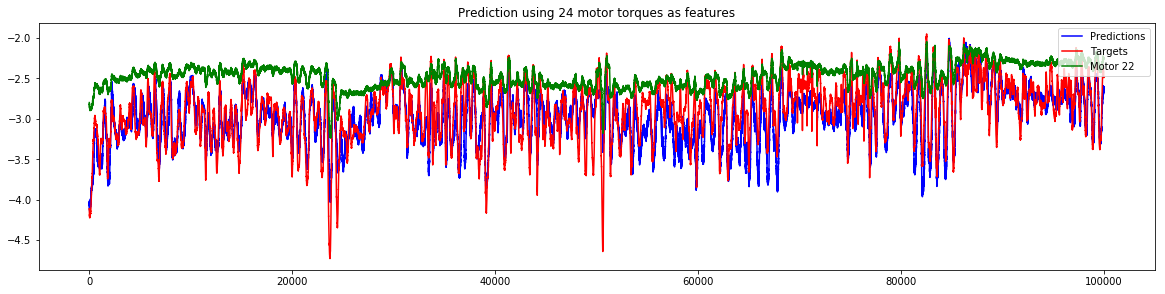

In [7]:
# Initializing session
init_op = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init_op)

#Define saver object to save NN
saver=tf.train.Saver()

costs = []

#setting up training
for epoch in range(300):
    total_batch=int(len(train_features)/batch_size)
    for i in range(total_batch):       
        inp_data= train_features[i*batch_size:(i+1)*batch_size,:]
        out_data= train_target[i*batch_size:(i+1)*batch_size,:]
        _,acc,c = sess.run([optimizer,accuracy,cost],feed_dict={Xin: inp_data, Ytarget: out_data})
    print("Epoch: {}, Cost: {}, Accuracy: {}".format(epoch,c,acc))
    costs.append(c)

#Save session after training
saver.save(sess,'NN_tension_pred_saver',global_step=200000)

print ("\nTraining complete!")

predicted=[]
test_batch=int(len(test_features)/batch_size)

#Test prediction with test dataset
for j in range (test_batch):    
    inp_data = test_features[j*batch_size:(j+1)*batch_size,:]
    pred = sess.run(y_, feed_dict={Xin: inp_data})
    predicted=np.append(predicted,pred)

#Plot prediction against real data from test dataset
x=np.arange(0,len(test_target))
y1= predicted
y2= test_target
y3=-test_features[:,21]*0.0175/0.008

fig= plt.figure(figsize=(20,10))
ax1=plt.subplot(211)
ax1.plot(x,y1,'b',label='Predictions')
ax1.plot(x,y2,'r',label='Targets')
ax1.plot(x,y3,'g',label='Motor 22')
ax1.legend(loc="upper right")

plt.title('Prediction using 24 motor torques as features')

plt.show()

sess.close()